Data Description
The dataset contains two files:

subject-info.csv contains the participant info at the time of the test. The variable ID identifies a participant, whereas the variable ID_test 
identifies an exercise test. This file contains 992 lines, one for each test. The different variables are described in the table below, with their 
corresponding amount or median [Inter Quartile Range] value.

variable

value

ID_test	992
ID	857
Age (years)	27.10 [21.10, 36.32]
Weight (kg)	73.00 [66.00, 80.23]
Height (cm)	175.00 [170.00, 180.00]
Humidity (%)	47.00 [42.00, 54.00]
Temperature (°C)	22.90 [20.80, 24.40]
Sex = 1 (Female) (%)	149 (15.0)


test_measure.csv, contains all the cardiorespiratory measurements taken during each effort test. The data is in long format, so the file contains one 
line for each breath measurement for all of the 992 effort tests, resulting in the 575087 lines present in the file. The time of each measurement is 
identified by the variable time indicating the seconds elapsed since the effort test start, the exercise test is identified by the ID_test variable,
and the variable ID indicates the participant. These effort tests contain a median [Inter Quartile Range] of 580 [484, 673] measures, for a median 
duration of 1093.00 [978.75, 1208.00] seconds. The variables in this file are:


time	Time since the measurement starts, in seconds
Speed	Speed of the treadmill, in km/h
HR	Heart rate, in beat per min
VO2	Oxygen consumption, in mL/min
VCO2	Carbon dioxide production, in mL/min
RR	Respiration rate, in respiration per minute
VE	Pulmonary ventilation, in L/min
ID	Participant identification
ID_test	Effort test identification
Note that VO2, VCO2, and VE measures are missing for 30 tests.

Usage Notes
ID_test, the variable identifying the GET, is named from the ID of the participant paired with the GET index. For example, ID_date = 245_3 is the third 
exercise test of participant ID = 245. An example of calculation in R [16] of simple heart rate recovery and cardiorespiratory index from these files
is provided in an associated GitHub repository [17].

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [84]:
subject_i = pd.read_csv("subject-info.csv")

In [86]:
test_m = pd.read_csv("test_measure.csv")

1. What is the average age of Female athletes who participated in this graded exercise tests?

In [80]:
female=subject_i[subject_i["Sex"]==1]
avg_age= np.mean(female['Age'])
print(avg_age)

26.044966442953022


2. Visualize age distribution of all athletes and display the median value in the chart.
   

0      10.8
1      11.8
2      12.2
3      13.2
4      13.7
       ... 
987    59.1
988    59.7
989    61.3
990    61.6
991    63.0
Name: Age, Length: 992, dtype: float64 28.979133064516127


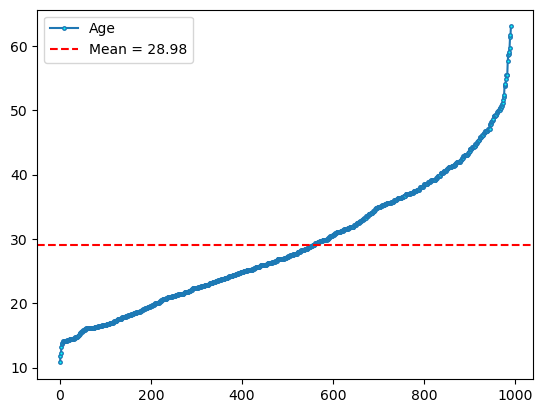

In [72]:
  
plt.plot(subject_i['Age'], label='Age',marker='o', ms=2.5, mfc='cyan')
mean_age=subject_i['Age'].mean()
print(subject_i['Age'],mean_age)

plt.axhline(mean_age, color='red', linestyle='--', label=f'Mean = {mean_age:.2f}')
plt.legend()
plt.show()

3	Find the maximum time taken for all tests and then visualize the distribution of number of tests based on the test duration in minutes. 
Use a line chart and display the count of tests in the chart as well.


4. Display the consolidated list of overweight or obese people based on their BMI.

In [123]:
#BMI = Weight (kg) / [Height (cm)/100] /^2  
#BMI between 25 and 29.9 is considered overweight. 

BMI=pd.DataFrame(subject_i['ID'],columns=['ID'])
BMI['Weight']=subject_i['Weight']
BMI['Height']=subject_i['Height']
BMI['BMI']=subject_i['Weight']/((subject_i['Height']/100)**2)
#BMI['Age']=subject_i['Age']
Overweight= BMI[(BMI['BMI'] > 25) & (BMI['BMI'] < 29.9)]
print(Overweight)

#print(BMI[BMI['ID']==7])

#df_patients[(df_patients['Glucose']>140) & (df_patients['Weight']>70)]


      ID  Weight  Height        BMI
34   134    76.0   173.0  25.393431
40   588    83.0   182.0  25.057360
41    40    77.0   165.0  28.282828
48   590    88.7   178.0  27.995203
54   313    68.0   158.0  27.239224
..   ...     ...     ...        ...
982  597    78.0   175.6  25.295635
985  755    64.0   157.0  25.964542
989  390   102.0   185.0  29.802776
990  596    74.0   169.0  25.909457
991  296    83.5   171.5  28.389532

[264 rows x 4 columns]
     ID  Weight  Height        BMI
502   7    70.0   171.7  23.744195
650   7    73.5   173.8  24.332560


5	Create a heatmap to visualize the correlations among any three cardiorespiratory measurements, Age, and BMI.

Age        10.8       11.8      12.2      13.2  13.7  13.8  14.0  14.1  14.2  \
HR                                                                             
63.0   18.36727   0.000000   0.00000   0.00000   0.0   0.0   0.0   0.0   0.0   
75.0    0.00000  18.222222   0.00000   0.00000   0.0   0.0   0.0   0.0   0.0   
82.0    0.00000   0.000000  17.96875   0.00000   0.0   0.0   0.0   0.0   0.0   
85.0    0.00000   0.000000   0.00000   0.00000   0.0   0.0   0.0   0.0   0.0   
87.0    0.00000   0.000000   0.00000  19.66759   0.0   0.0   0.0   0.0   0.0   
...         ...        ...       ...       ...   ...   ...   ...   ...   ...   
193.0   0.00000   0.000000   0.00000   0.00000   0.0   0.0   0.0   0.0   0.0   
194.0   0.00000   0.000000   0.00000   0.00000   0.0   0.0   0.0   0.0   0.0   
195.0   0.00000   0.000000   0.00000   0.00000   0.0   0.0   0.0   0.0   0.0   
196.0   0.00000   0.000000   0.00000   0.00000   0.0   0.0   0.0   0.0   0.0   
197.0   0.00000   0.000000   0.00000   0

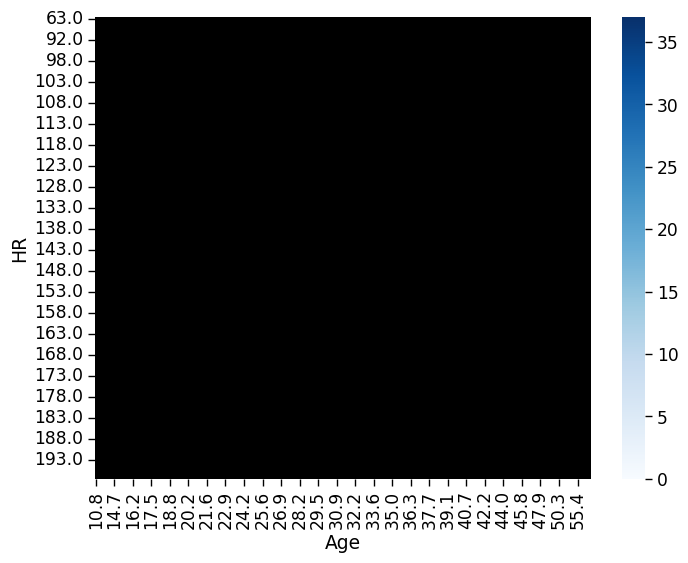

In [131]:
# Need to check
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

HR_H=pd.DataFrame(subject_i['Age'],columns=['Age'])
HR_H['BMI']=BMI['BMI']
HR_H['HR']=test_m['HR']
HR_H = HR_H.pivot_table(index='HR', columns='Age', values='BMI')
HR_H.fillna(0, inplace=True)
print(HR_H)
sns.heatmap(HR_H, cmap='Blues', linecolor='black', linewidth=0.1)
plt.show()


7 Get a number from the user and print its multiplication table from 1 to 10.

In [175]:
n = int(input("Enter an integer number: "))

i=1
print(f"Multiplication table for {n}")
for i in range(1,11):
  m=n*i
  print(f"{n}*{i} ={m}")
  i +=1

Enter an integer number:  5


Multiplication table for 5
5*1 =5
5*2 =10
5*3 =15
5*4 =20
5*5 =25
5*6 =30
5*7 =35
5*8 =40
5*9 =45
5*10 =50


In [4]:
from mpl_toolkits.mplot3d import Axes3D

11	Plot a 3-D graph using any set of random values chosen by you

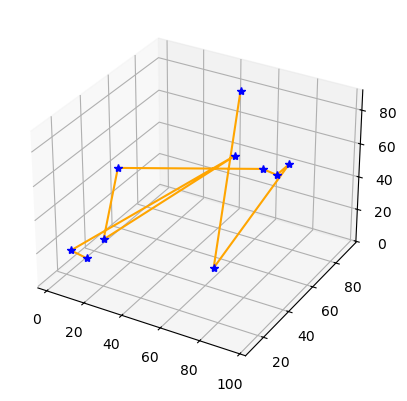

In [68]:
x=np.random.randint(0,100,10)
y=np.random.randint(10,100,10)
z=[1,20,50,23,45,68,78,41,39,90]
fig=plt.figure()  #This creates a new figure canvas using matplotlib.pyplot.figure().
ax = fig.add_subplot(111, projection='3d') #represents your 3D axes object.
ax.plot3D(x, y, z, 'orange', marker='*', mec='b', mfc='blue')
plt.show()

12.connect to database using PostgreSQL and get the details of participants in test 1 and age > 50

In [ ]:
select * from subject_info 
where 
"Age" >50
and
rtrim("ID_test") like '%_1'





13	Make athelete ID as index to the subject_info table and arrange index in sorted order.

In [156]:
subject_i1=subject_i
subject_i1=subject_i1.set_index('ID', inplace=True)

subject_i1=subject_i1.sort_index()

print(subject_i1)

      Age  Weight  Height  Humidity  Temperature  Sex ID_test
ID                                                           
1    32.7    67.0   173.5       NaN          NaN    0     1_1
2    33.8    68.0   171.1       NaN          NaN    0     2_1
3    16.6    63.8   176.0      43.0         24.6    0     3_1
4    28.5    88.0   181.3       NaN          NaN    0     4_1
5    23.4    85.0   181.4       NaN          NaN    0     5_1
..    ...     ...     ...       ...          ...  ...     ...
855  42.4    61.2   165.6      47.9         22.6    0   855_1
856  58.7    66.0   171.3      38.0         15.0    0   856_1
856  59.1    64.7   172.0      38.0         24.4    0   856_2
856  59.7    65.2   172.0      51.0         16.8    0   856_3
857  29.0    80.1   188.0      53.0         26.3    0   857_1

[992 rows x 7 columns]


15	Calculate the moving average(rolling mean) of HR for participant with ID 2 in a window size of 10 and plot a graph to show both moving average and original HR.

        HR  moving_avg
0     63.0  138.894148
1     75.0  138.894148
2     82.0  138.894148
3     87.0  138.894148
4     92.0  138.894148
..     ...         ...
597  120.0  121.600000
598  120.0  121.200000
599  121.0  121.000000
600  121.0  120.900000
601  121.0  120.800000

[602 rows x 2 columns]


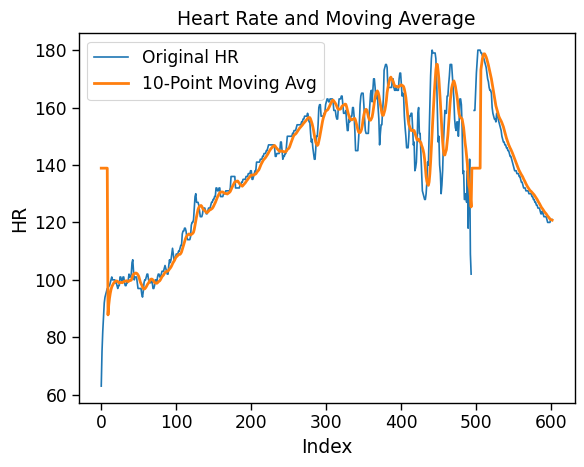

In [172]:

mov_avg=pd.DataFrame(test_m[test_m['ID']==2], columns=['HR'])
mov_avg['moving_avg'] = mov_avg['HR'].rolling(window=10).mean()

mov_avg['moving_avg'].fillna(mov_avg['moving_avg'].mean(), inplace=True)
print(mov_avg)

plt.plot(mov_avg['HR'], label='Original HR')
plt.plot(mov_avg['moving_avg'], label='10-Point Moving Avg', linewidth=2)
plt.title('Heart Rate and Moving Average')
plt.xlabel('Index')
plt.ylabel('HR')
plt.legend()
plt.show()



In [44]:
a=subject_i[test_m['Age']>30]
print(a['Age'])

590    30.1
591    30.1
592    30.3
593    30.3
594    30.4
       ... 
987    59.1
988    59.7
989    61.3
990    61.6
991    63.0
Name: Age, Length: 402, dtype: float64
